<a href="https://colab.research.google.com/github/aycaaozturk/Nail-Melanoma-Project/blob/main/Vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Load necessary libraries
from __future__ import print_function
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # Define the model
def VGGupdated(input_tensor=None, classes=2):
    img_rows, img_cols = 300, 300
    img_channels = 3
    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1

    # builds a convolution layer
    # slides 64 filters with 3*3 matrices on the image -> creates 64 feature maps
    # works on 2d input, extracts features like color, shape
    # activation function: relu (negtives to positives)
    # adds padding if needed, so that the sizes are the same


    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)

    # pooling: reduces the size of the feature map, keeps the important features

    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model
    model = Model(inputs=img_input, outputs=x, name='VGGdemo')
    return model


In [ ]:
# Updated dataset paths based on the folder structure
train_path = '/content/drive/My Drive/yolov8 format all datasets/nail_dataset/train'
test_path = '/content/drive/My Drive/yolov8 format all datasets/nail_dataset/test'
classes = ['healthy', 'melanoma']

def load_data(data_path, img_size=300):
    images = []
    labels = []

    for label in classes:
        class_path = os.path.join(data_path, label)
        filenames = os.listdir(class_path)
        for f in filenames:
            img = cv2.imread(os.path.join(class_path, f))
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label)

    # Convert to numpy array and normalize
    images = np.array(images)
    images = images.astype('float32') / 255.0

    # Encode labels
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)
    labels_onehot = to_categorical(labels_encoded, num_classes=2)

    return images, labels_onehot

In [ ]:
# Load train and test data
train_x, train_y = load_data(train_path)
test_x, test_y = load_data(test_path)

# Shuffle training data
train_x, train_y = shuffle(train_x, train_y, random_state=1)

# Inspect the shape of the training and testing data
print("Training data shape:", train_x.shape)
print("Testing data shape:", test_x.shape)

# Compile the model
model = VGGupdated(classes=2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Training data shape: (1700, 300, 300, 3)
Testing data shape: (486, 300, 300, 3)


In [ ]:
# Train the model and save the history
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))

# Save the trained model to Google Drive
model_save_path = '/content/drive/MyDrive/vgg19Model/vgg_nail_model.h5'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")
# Evaluate the model
loss, acc = model.evaluate(test_x, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", acc)



Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 478ms/step - accuracy: 0.7662 - loss: 0.5449 - val_accuracy: 0.7469 - val_loss: 0.5715
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 465ms/step - accuracy: 0.7816 - loss: 0.5257 - val_accuracy: 0.7469 - val_loss: 0.5657
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 464ms/step - accuracy: 0.7783 - loss: 0.5313 - val_accuracy: 0.7469 - val_loss: 0.5690
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 464ms/step - accuracy: 0.7755 - loss: 0.5337 - val_accuracy: 0.7469 - val_loss: 0.5666
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 464ms/step - accuracy: 0.7791 - loss: 0.5284 - val_accuracy: 0.7469 - val_loss: 0.5687
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 463ms/step - accuracy: 0.7612 - loss: 0.5516 - val_accuracy: 0.7469 - val_loss: 0.5691
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 460ms/step - accuracy: 0.7641 - loss: 0.5473 - val_accuracy: 0.7469 - val_loss: 0.5736
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 460ms/step - accuracy: 0.7783 - loss: 0.5317 - val_accu

In [ ]:
img_path = '/content/drive/MyDrive/vgg19Model/path_to_new_image.jpg'

import os
print("File exists:", os.path.exists(img_path))

File exists: False


<Figure size 1200x400 with 0 Axes>

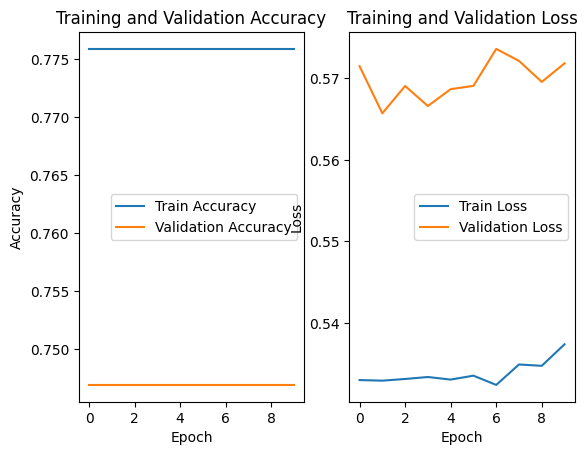

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.show()
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
 # Example of predicting a new image   COMMENT OUT TO CLASSIFY YOUR IMAGE
   #  img_path = '/content/drive/MyDrive/vgg19Model/path_to_new_image.jpg'  # Replace with your image path
   #  img = cv2.imread(img_path)
    # img = cv2.resize(img, (300, 300))
    # img = np.expand_dims(img, axis=0)
    # img = img.astype('float32') / 255.0

# Load the saved model and predict
#model = load_model(model_save_path)
#pred = model.predict(img)
#predicted_class = np.argmax(pred, axis=1)
#class_labels = {0: 'healthy', 1: 'melanoma'}
#print(f"Prediction: {class_labels[predicted_class[0]]}")

<Figure size 500x500 with 0 Axes>

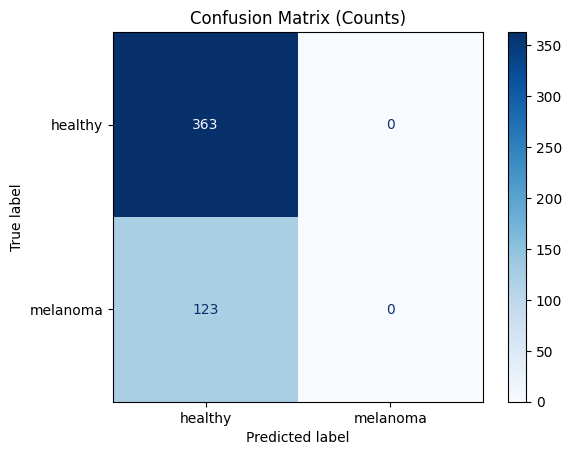

<Figure size 500x500 with 0 Axes>

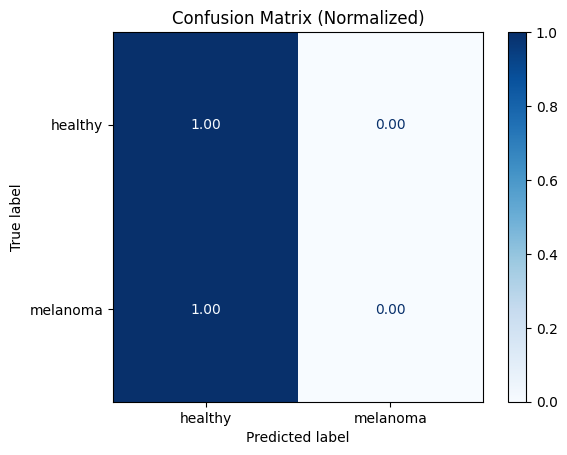

              precision    recall  f1-score   support

     healthy      0.747     1.000     0.855       363
    melanoma      0.000     0.000     0.000       123

    accuracy                          0.747       486
   macro avg      0.373     0.500     0.428       486
weighted avg      0.558     0.747     0.639       486



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

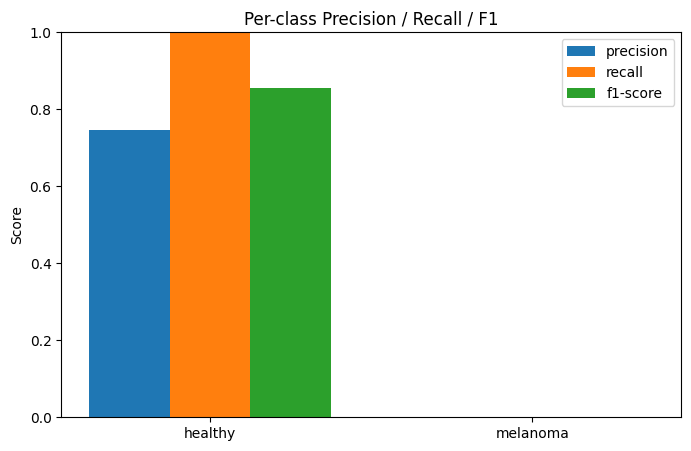

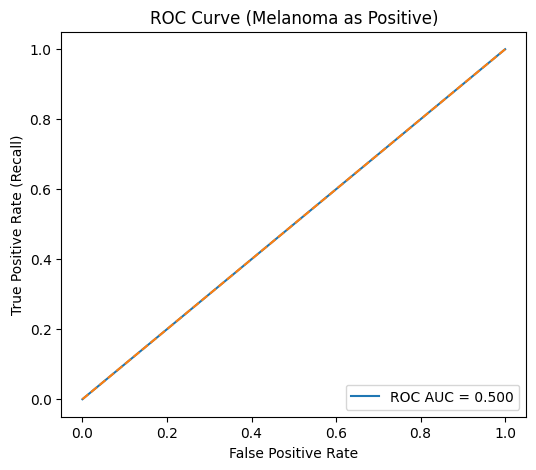

/tmp/ipython-input-126460376.py:72: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ap = np.trapz(prec, rec)  # simple area under PR curve (approx)


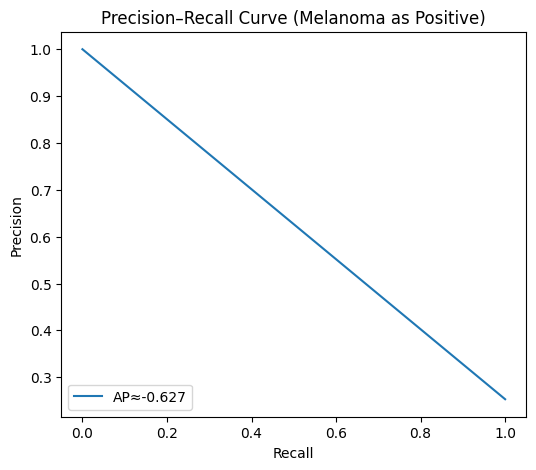

In [ ]:
# --- Metrics & Visualizations ---
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc,
    precision_recall_curve
)
import numpy as np
import matplotlib.pyplot as plt

# 1) Get y_true and y_score / y_pred
# test_y is one-hot; convert to integer labels
y_true = np.argmax(test_y, axis=1)

# Scores from the model (softmax for 2 classes -> column 1 is "melanoma" prob)
y_score = model.predict(test_x, verbose=0)[:, 1]   # probability for positive class (melanoma)

# Hard predictions (threshold=0.5). Adjust threshold if needed for sensitivity/specificity tradeoff.
y_pred = (y_score >= 0.5).astype(int)

class_names = ['healthy', 'melanoma']  # keep consistent order

# 2) Confusion Matrix (counts)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,5))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix (Counts)')
plt.show()

# Optional: Normalized confusion matrix (per true class)
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(5,5))
ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=class_names).plot(values_format='.2f', cmap='Blues')
plt.title('Confusion Matrix (Normalized)')
plt.show()

# 3) Classification report (per-class precision, recall, F1 + macro/weighted avg)
report = classification_report(y_true, y_pred, target_names=class_names, digits=3, output_dict=True)
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

# 4) Bar chart of per-class Precision / Recall / F1
per_class_metrics = ['precision','recall','f1-score']
x = np.arange(len(class_names))
width = 0.25

plt.figure(figsize=(8,5))
for i, m in enumerate(per_class_metrics):
    plt.bar(x + i*width,
            [report[c][m] for c in class_names],
            width=width, label=m)
plt.xticks(x + width, class_names)
plt.ylim(0, 1.0)
plt.ylabel('Score')
plt.title('Per-class Precision / Recall / F1')
plt.legend()
plt.show()

# 5) ROC curve (positive class = melanoma)
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (Melanoma as Positive)')
plt.legend(loc='lower right')
plt.show()

# 6) Precision-Recall curve (often more informative with class imbalance)
prec, rec, _ = precision_recall_curve(y_true, y_score)
ap = np.trapz(prec, rec)  # simple area under PR curve (approx)
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'AP≈{ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Melanoma as Positive)')
plt.legend(loc='lower left')
plt.show()
